In [72]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 
from numpy import cos
from numpy import sin
import scipy.integrate as integrate
import time
from skopt import gp_minimize
import pandas as pd
import time
from neat.parallel import ParallelEvaluator
import multiprocessing as mp
from multiprocessing import Pool
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D

In [59]:
## whole field
def B(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*cos(w*t) +np.array([0,1,0])*sin(w*t) )+\
    v2*(np.array([1,0,0])*cos((n-1)*w*t) +np.array([0,1,0])*sin((n-1)*w*t))+\
    v3*(np.array([0,-1,0])*cos((n-1)*w*t) +np.array([1,0,0])*sin((n-1)*w*t))+\
    v4*(np.array([0,0,1])*sin(n*w*t))+\
    v5*(np.array([0,0,1])*cos(n*w*t))+\
    v6*(np.array([-1,0,0])*cos((n+1)*w*t) +np.array([0,1,0])*sin((n+1)*w*t))+\
    v7*(np.array([0,1,0])*cos((n+1)*w*t) +np.array([1,0,0])*sin((n+1)*w*t)))
    
def B_prime(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*sin(w*t) +np.array([0,1,0])*cos(w*t) )*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([0,1,0])*(n-1)*cos((n-1)*w*t))*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*sin((n-1)*w*t) +np.array([1,0,0])*(n-1)*cos((n-1)*w*t))*w+\
    v4*(np.array([0,0,1])*n*cos(n*w*t))*w+\
    v5*(np.array([0,0,1])*(-1)*n*sin(n*w*t))*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([0,1,0])*(n+1)*cos((n+1)*w*t))*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*sin((n+1)*w*t) +np.array([1,0,0])*(n+1)*cos((n+1)*w*t))*w)

def B_prime2(t):
    global v
    global n
    global w
    global a
    v1=v[0]
    v2=v[1]
    v3=v[2]
    v4=v[3]
    v5=v[4]
    v6=v[5]
    v7=v[6]
    return np.dot(np.array([[1,0,0],[0,cos(a),-sin(a)],[0,sin(a),cos(a)]]),\
    v1*(np.array([-1,0,0])*(-1)*cos(w*t) +np.array([0,1,0])*(-1)*sin(w*t) )*w*w+\
    v2*(np.array([1,0,0])*(-1)*(n-1)*(n-1)*cos((n-1)*w*t) +np.array([0,1,0])*(-1)*(n-1)*(n-1)*sin((n-1)*w*t))*w*w+\
    v3*(np.array([0,-1,0])*(-1)*(n-1)*(n-1)*cos((n-1)*w*t) +np.array([1,0,0])*(-1)*(n-1)*(n-1)*sin((n-1)*w*t))*w*w+\
    v4*(np.array([0,0,1])*(-1)*n*n*sin(n*w*t))*w*w+\
    v5*(np.array([0,0,1])*(-1)*n*n*cos(n*w*t))*w*w+\
    v6*(np.array([-1,0,0])*(-1)*(n+1)*(n+1)*cos((n+1)*w*t) +np.array([0,1,0])*(-1)*(n+1)*(n+1)*sin((n+1)*w*t))*w*w+\
    v7*(np.array([0,1,0])*(-1)*(n+1)*(n+1)*cos((n+1)*w*t) +np.array([1,0,0])*(-1)*(n+1)*(n+1)*sin((n+1)*w*t))*w*w)







    

In [60]:
lam=1.8686003910229945
v=np.random.uniform(low=-1, high=1, size=(7,))
v=[1,-1,0,0.5,1,-0.5,-1]
n=6
w=1
Y=0.10772427142152266
a=-5/180*np.pi


In [61]:
v=[1,-1,0,0.5,1,-0.5,-1]


## each direction 



In [62]:
## ux1,uy1,
def ux1(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((lam*Bx**2+By**2+Bz**2)*Bx_p+(-1+lam)*Bx*By*By_p)- Bx*Bz_p  )\
    /(Bx**2+By**2+Bz**2)
def uy1(T):
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    return ( Bz/(lam*(Bx**2+By**2)+Bz**2)*((Bx**2+lam*By**2+Bz**2)*By_p+(-1+lam)*Bx*By*Bx_p)-By*Bz_p )\
    /(Bx**2+By**2+Bz**2)

In [63]:
## ux2
def ux2(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    Bx_p2,By_p2,Bz_p2=B_prime2(T)
    
    
    a1=Bx*Bz*(Bx**2+By**2+Bz**2)**2*(By*Bx_p-Bx*By_p)**2/(lam*Bx**2+lam*By**2+Bz**2)**2
    #############
    a2=(2*By*Bz**2*(By*Bx_p-Bx*By_p) *(-Bx*Bz*Bx_p+Bx**2*Bz_p+By *(-Bz*By_p +By*Bz_p)))\
    /(lam*Bx**2+lam*By**2+Bz**2)
    
    ##########
    a3= (2*By*Bz*(Bx**2 + By**2 + Bz**2)*(-2*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
    (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p+ 
    By*By_p) + (Bx**2 + By**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*
    (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
    By*By_p + Bz*Bz_p) - 
    2*(Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(-(By*Bx_p) +
    Bx*By_p)*(lam*Bx*Bx_p + lam*By*By_p + 
    Bz*Bz_p) + (Bz*((2 - lam)*Bx**2 - (-2 + lam)*By**2 + Bz**2)*
    (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p) + Bx*By_p)*
    (-(Bx**2*Bz_p) + Bx*Bz*Bx_p + 
    By*(Bz*By_p - By*Bz_p)))/(Bx**2 + By**2 + Bz**2) + 
    (Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*
    (-(By*Bx_p2) + Bx*By_p2)))/\
    ((lam*Bx**2 + lam*By**2 + Bz**2)**2*(lam*(Bx**2 + By**2) + Bz**2))
    a4=Bx*((Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - Bx*By_p)**2)\
    /(lam*Bx**2 + lam*By**2 + Bz**2)**2 - 
    2*(Bx*Bx_p + By*By_p)*(-(Bx*Bz*Bx_p) + 
    Bx**2*Bz_p + By*(-(Bz*By_p) + By*Bz_p)) - 
    (6*(Bx**2 + By**2)*(Bx*Bx_p + By*By_p + 
    Bz*Bz_p)*(-(Bx*Bz*Bx_p) + Bx**2*Bz_p + 
    By*(-(Bz*By_p) + By*Bz_p)))/
    (Bx**2 + By**2 + Bz**2) + 2*(Bx**2 + By**2)*
    (Bx*Bx_p*Bz_p - 
    Bz*(Bx_p**2 + By_p**2 + Bx*Bx_p2 + 
    By*By_p2) + Bx**2*Bz_p2 + 
    By*(By_p*Bz_p + By*Bz_p2)))
    
    
    return (a1+a2+a3+a4)/(2*(Bx**2+By**2 )**2*(Bx**2+By**2+Bz**2)**1.5)



In [64]:
## uy2
def uy2(T):
    global lam
    Bx,By,Bz=B(T)
    Bx_p,By_p,Bz_p=B_prime(T)
    Bx_p2,By_p2,Bz_p2=B_prime2(T)
    return ((By*Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - Bx*By_p)**2)\
             /(lam*Bx**2 + lam*By**2 + Bz**2)**2 + 
            (2*Bx*Bz**2*(-(By*Bx_p) + Bx*By_p)*\
            (-(Bx*Bz*Bx_p) + Bx**2*Bz_p + 
            By*(-(Bz*By_p) + By*Bz_p)))/
            (lam*Bx**2 + lam*By**2 + Bz**2) - (2*Bx*Bz*(Bx**2 + By**2 + Bz**2)*\
            (-2*(Bx**2 + By**2 + Bz**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
            (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
            By*By_p) + (Bx**2 + By**2)*(lam*Bx**2 + lam*By**2 + Bz**2)*\
            (-(By*Bx_p) + Bx*By_p)*(Bx*Bx_p + 
            By*By_p + Bz*Bz_p) - 
            2*(Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*(-(By*Bx_p) + 
            Bx*By_p)*(lam*Bx*Bx_p + lam*By*By_p + 
            Bz*Bz_p) + (Bz*((2 - lam)*Bx**2 - (-2 + lam)*By**2 + Bz**2)*\
            (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p) + 
            Bx*By_p)*(Bx*Bz*Bx_p - Bx**2*Bz_p + 
            By*(Bz*By_p - By*Bz_p)))/ \
            (Bx**2 + By**2 + Bz**2) + (Bx**2 + By**2)*(Bx**2 + By**2 + Bz**2)*\
            (lam*Bx**2 + lam*By**2 + Bz**2)*(-(By*Bx_p2) + 
            Bx*By_p2)))/((lam*Bx**2 + lam*By**2 + Bz**2)**2*\
            (lam*(Bx**2 + By**2) + Bz**2)) + 
            By*((Bz*(Bx**2 + By**2 + Bz**2)**2*(By*Bx_p - 
            Bx*By_p)**2)/(lam*Bx**2 + lam*By**2 + Bz**2)**2 - 
            2*(Bx*Bx_p + By*By_p)*(-(Bx*Bz*Bx_p) + 
            Bx**2*Bz_p + By*(-(Bz*By_p) + 
            By*Bz_p)) - (6*(Bx**2 + By**2)*(Bx*Bx_p + 
            By*By_p + Bz*Bz_p)*(-(Bx*Bz*Bx_p) + 
            Bx**2*Bz_p + By*(-(Bz*By_p) + 
            By*Bz_p)))/(Bx**2 + By**2 + Bz**2) + 
            2*(Bx**2 + By**2)*(Bx*Bx_p*Bz_p - 
            Bz*(Bx_p**2 + By_p**2 + Bx*Bx_p2 + 
            By*By_p2) + Bx**2*Bz_p2 + 
            By*(By_p*Bz_p + By*Bz_p2))))/\
            (2*(Bx**2 + By**2)**2*(Bx**2 + By**2 + Bz**2)**(3/2))



In [65]:
import scipy.integrate as integrate
def target(vv):
    global v
    v=vv
    dx1=np.mean([ux1(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dx2=np.mean([ux2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dy1=np.mean([uy2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    return -np.absolute(dy1/(np.absolute(dx1)+np.absolute(dx2)))*np.sign(dy1)

In [66]:
import scipy.integrate as integrate
def test(vv):
    global v
    v=vv
    dx1=np.mean([ux1(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dx2=np.mean([ux2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    dy1=np.mean([uy2(i) for i in np.linspace(0,2*np.pi,1000) ])*2*np.pi
    return print("dx1="+str(dx1)+",dx2="+str(dx2)+",dy2="+str(dy1))

In [67]:

sam= np.array([np.random.uniform(low=-1, high=1),np.random.uniform(low=0.1, high=1),np.random.uniform(low=-1, high=1)])
sam= np.random.uniform(low=-1, high=1, size=(7,))
sam

array([ 0.4575632 ,  0.55148109, -0.46659625, -0.34776674, -0.68904363,
        0.20860468,  0.85053462])

In [68]:
start = time.time()
Target=target(sam)
end = time.time()
print(end - start)
print(Target)

1.1431000232696533
-25.621315049158397


# Latin hypercude samping

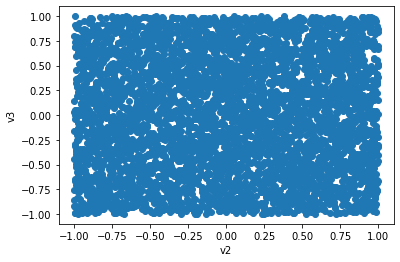

In [69]:


from smt.sampling_methods import LHS

xlimits = np.array([[-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0]])
sampling = LHS(xlimits=xlimits)
num = 5000
test = sampling(num)


plt.plot(test[:, 2], test[:, 3], "o")
plt.xlabel("v2")
plt.ylabel("v3")
plt.show()

In [39]:
start = time.time()
p = Pool(mp.cpu_count())
result=p.map(target, test)
end = time.time()
print(end - start)

1543.7625861167908


(-20, 20)

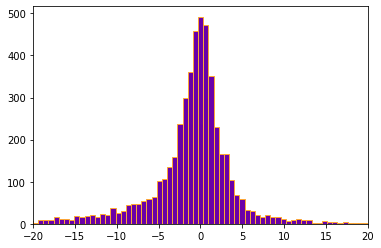

In [70]:
plt.hist(result,800,facecolor=cm.plasma(0.2), edgecolor=cm.plasma(0.8))
plt.xlim(-20,20)


Automatically created module for IPython interactive environment
t-SNE: 7.3 sec


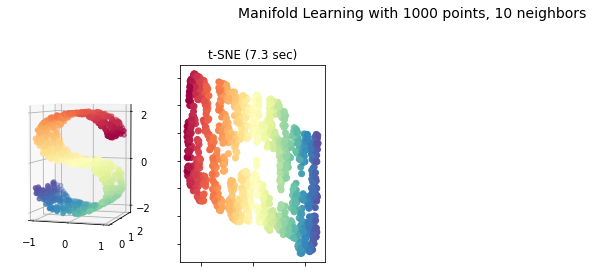

In [78]:
print(__doc__)

from collections import OrderedDict
from functools import partial


from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods

methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()


In [76]:
methods

OrderedDict([('LLE',
              LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                                     method='standard', modified_tol=1e-12, n_components=2,
                                     n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
                                     random_state=None, reg=0.001, tol=1e-06)),
             ('LTSA',
              LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                                     method='ltsa', modified_tol=1e-12, n_components=2,
                                     n_jobs=None, n_neighbors=10, neighbors_algorithm='auto',
                                     random_state=None, reg=0.001, tol=1e-06)),
             ('Hessian LLE',
              LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                                     method='hessian', modified_tol=1e-12, n_components=2,
                                 

# parrellel computing CMA-es

In [94]:
import cma

In [95]:
for i in range(10):

    with cma.fitness_transformations.EvalParallel(6) as eval_all:
        es = cma.CMAEvolutionStrategy(np.random.uniform(low=-1, high=1, size=(7,)), 0.5,{'maxfevals':500,'bounds': [[-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,1]],\
                                                                                      'verb_disp': 200  ,'verb_log': 200  } )
        while not es.stop():
            X = es.ask()
            es.tell(X, eval_all(target, X))  
            # was: es.tell(X, [fitness(x) for x in X])
            es.disp()
    np.savetxt("cma_es_10fold_parrelel_"+str(i)+".csv", es.result.xbest, delimiter=",")


(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=723011, Thu Feb 13 14:46:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -8.455482497226562e+00 1.0e+00 4.61e-01  4e-01  5e-01 0:02.8
    2     18 -6.943602500272765e-01 1.3e+00 4.47e-01  4e-01  5e-01 0:05.7
    3     27 -7.487623930931509e+00 1.5e+00 4.44e-01  4e-01  5e-01 0:08.7
    4     36 -2.619996289699113e+01 1.5e+00 4.73e-01  4e-01  5e-01 0:11.8
    6     54 -1.031205100414521e+01 1.8e+00 4.49e-01  4e-01  5e-01 0:17.7
    8     72 -8.085497583970078e+00 1.8e+00 4.08e-01  3e-01  5e-01 0:23.2
   11     99 -1.391914570477402e+01 2.0e+00 4.06e-01  3e-01  5e-01 0:31.1
   14    126 -1.881656400932710e+01 2.4e+00 4.59e-01  4e-01  6e-01 0:39.2
   17    153 -2.186542191920020e+01 2.5e+00 4.40e-01  3e-01  5e-01 0:47.3
   21    189 -4.961527974005980e+01 2.4e+00 3.49e-01  3e-01  4e-01 0:58.1
   25    225 -1.055374821304740e+02 2.2e+00 3.05e-01  2e-01  3e-01 1:09.1
   30    270 -4.92456886

   41    369 -9.223518591986495e+02 3.1e+00 5.86e-02  3e-02  5e-02 1:51.3
   46    414 -6.518539614069033e+02 3.2e+00 4.76e-02  2e-02  4e-02 2:06.5
   52    468 -1.391121948789082e+03 3.4e+00 3.84e-02  1e-02  3e-02 2:23.8
   56    504 -1.309434096984553e+03 4.1e+00 3.33e-02  1e-02  3e-02 2:35.9
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=684348, Thu Feb 13 15:02:21 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.280746807716326e+01 1.0e+00 4.79e-01  5e-01  5e-01 0:03.9
    2     18 -2.065031413062295e+01 1.2e+00 4.26e-01  4e-01  4e-01 0:07.5
    3     27 -7.144268842031907e+00 1.3e+00 4.30e-01  4e-01  5e-01 0:10.7
    4     36 -1.152146448648353e+01 1.3e+00 3.97e-01  4e-01  4e-01 0:13.8
    6     54 -2.718001222717894e+01 1.4e+00 4.08e-01  4e-01  5e-01 0:20.5
    8     72 -1.072314941042033e+01 1.6e+00 5.26e-01  5e-01  6e-01 0:27.4
   10     90 -5.377505403924376e+00 1.6e+00 5.21e-01  4e-01  6e-01 0:34.4
   13    117 -1.53203419

In [14]:
test(pd.read_csv("cma_es_10fold_parrelel_0.csv",header=None).values.flatten())

dx1=-0.41917197930099687,dx2=0.1878844368146809,dy2=767.7504865403533
